In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

df = pd.read_csv("../data/Instagram_Analytics.csv")

df.columns = df.columns.str.strip().str.lower()
df['post_datetime'] = pd.to_datetime(df['post_datetime'], errors='coerce')


In [23]:
total_posts = len(df)
avg_engagement = df['engagement_rate'].mean()
total_followers_gained = df['followers_gained'].sum()
avg_reach = df['reach'].mean()

print("Total Posts:", total_posts)
print("Average Engagement Rate:", round(avg_engagement,4))
print("Total Followers Gained:", total_followers_gained)
print("Average Reach:", round(avg_reach,2))


Total Posts: 29999
Average Engagement Rate: 0.0421
Total Followers Gained: 15064082
Average Reach: 6272.48


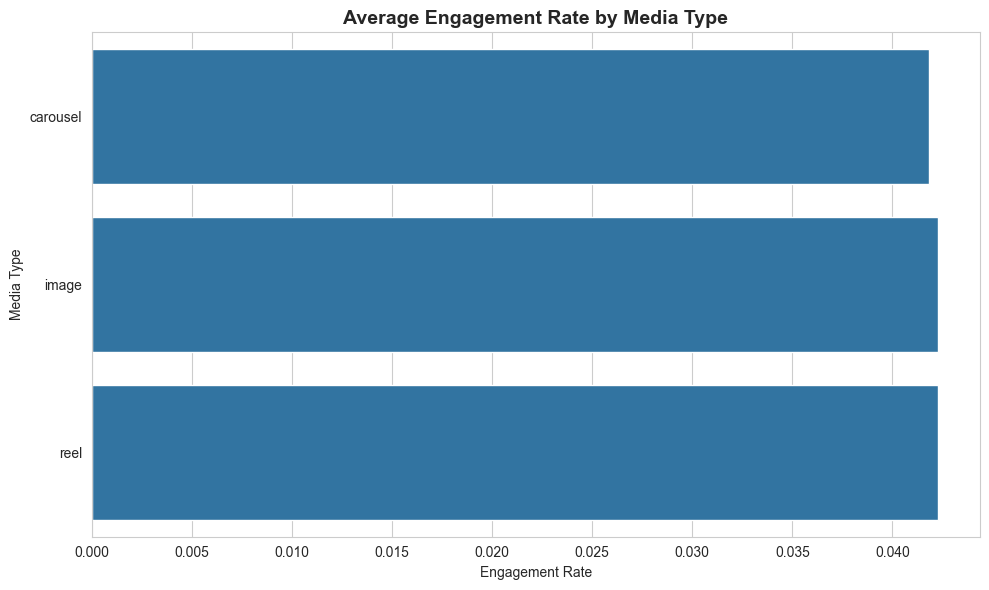

In [24]:
media_perf = df.groupby('media_type')['engagement_rate'].mean().sort_values()

plt.figure()
sns.barplot(x=media_perf.values, y=media_perf.index)
plt.title("Average Engagement Rate by Media Type", fontsize=14, fontweight='bold')
plt.xlabel("Engagement Rate")
plt.ylabel("Media Type")
plt.tight_layout()
plt.savefig("../visuals/engagement_by_media_type.png", dpi=300)
plt.show()


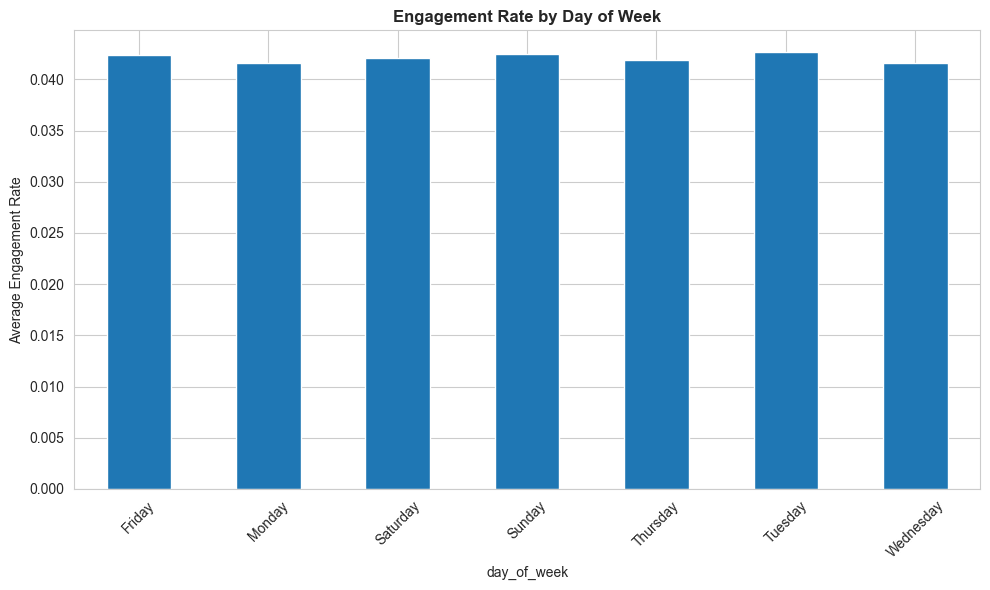

In [25]:
day_perf = df.groupby('day_of_week')['engagement_rate'].mean()

plt.figure()
day_perf.plot(kind='bar')
plt.title("Engagement Rate by Day of Week", fontweight='bold')
plt.ylabel("Average Engagement Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../visuals/engagement_by_day.png", dpi=300)
plt.show()


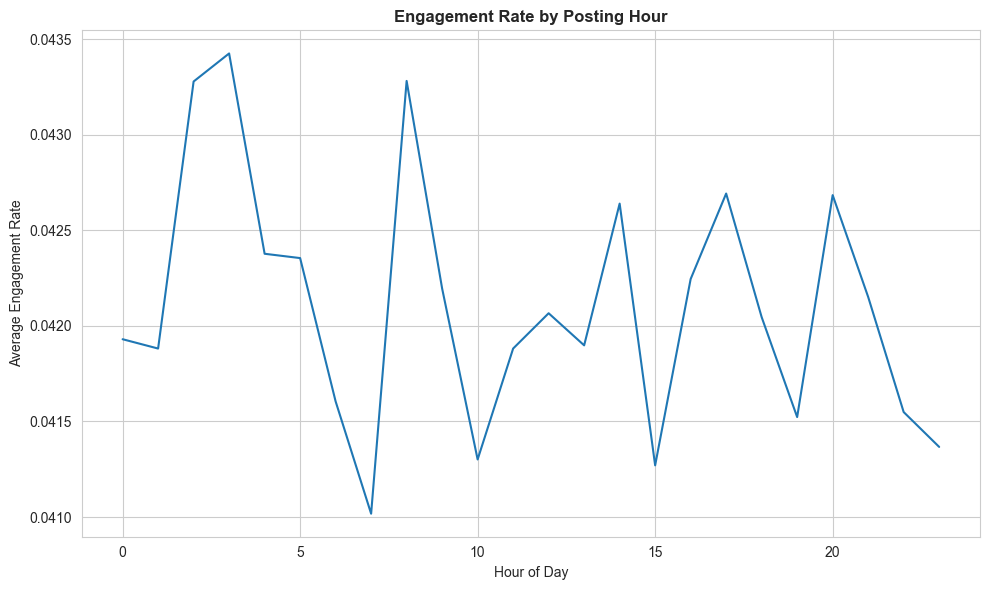

In [26]:
hour_perf = df.groupby('post_hour')['engagement_rate'].mean()

plt.figure()
hour_perf.plot()
plt.title("Engagement Rate by Posting Hour", fontweight='bold')
plt.xlabel("Hour of Day")
plt.ylabel("Average Engagement Rate")
plt.tight_layout()
plt.savefig("../visuals/engagement_by_hour.png", dpi=300)
plt.show()


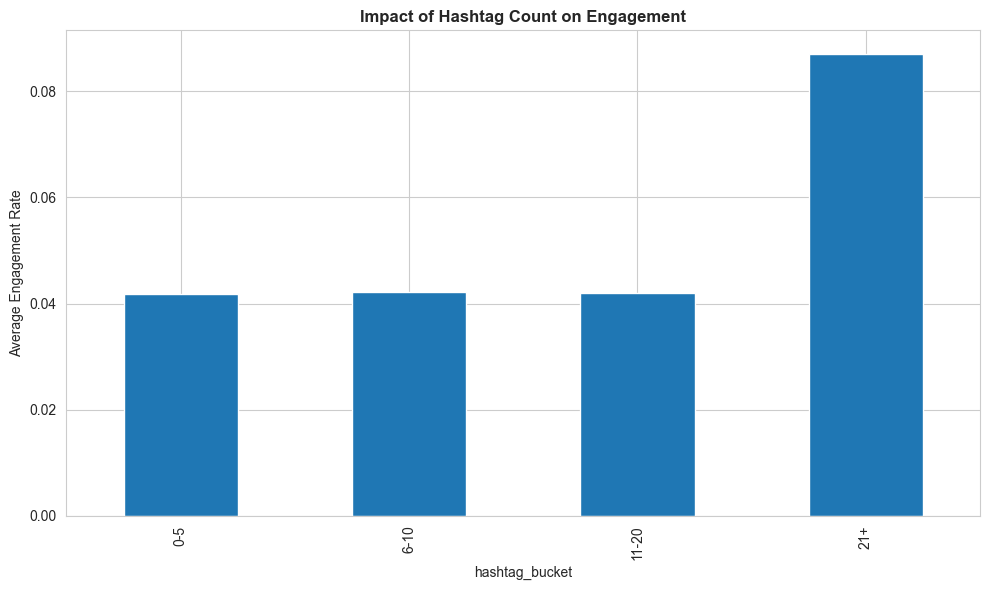

In [27]:
df['hashtag_bucket'] = pd.cut(
    df['hashtags_count'],
    bins=[0,5,10,20,50],
    labels=['0-5','6-10','11-20','21+']
)

hash_perf = df.groupby('hashtag_bucket')['engagement_rate'].mean()

plt.figure()
hash_perf.plot(kind='bar')
plt.title("Impact of Hashtag Count on Engagement", fontweight='bold')
plt.ylabel("Average Engagement Rate")
plt.tight_layout()
plt.savefig("../visuals/hashtag_impact.png", dpi=300)
plt.show()


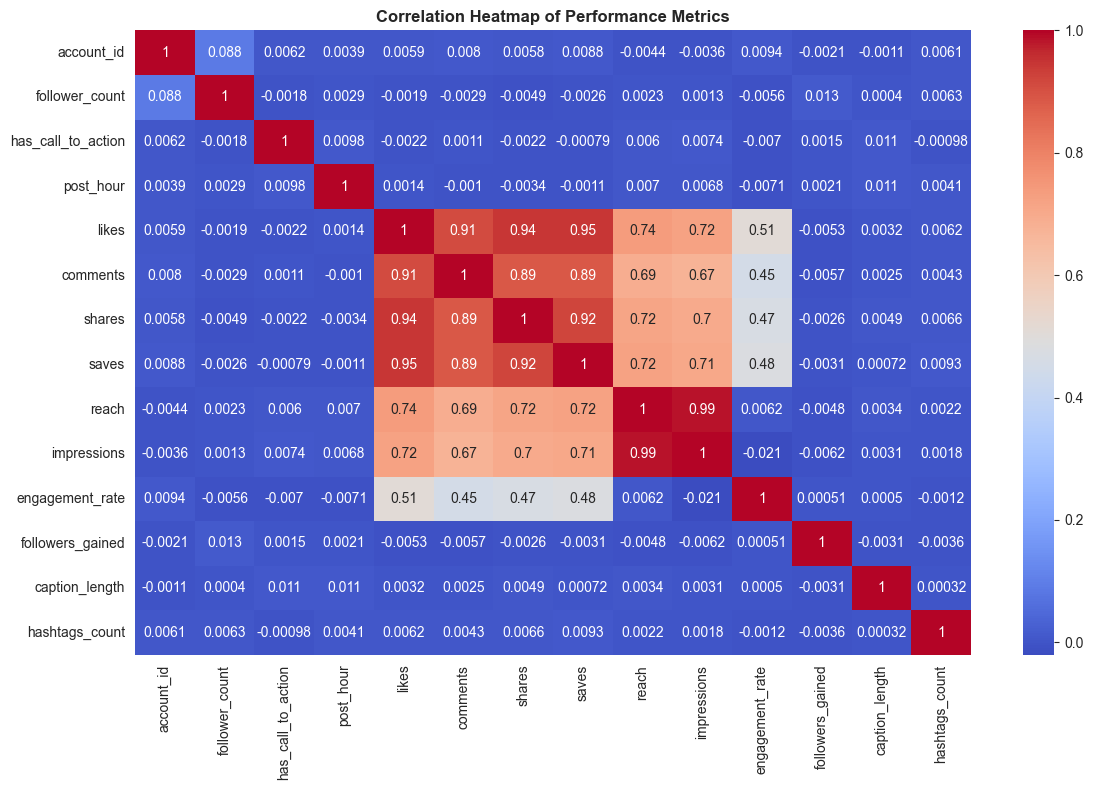

In [28]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True)
plt.title("Correlation Heatmap of Performance Metrics", fontweight='bold')
plt.tight_layout()
plt.savefig("../visuals/correlation_heatmap.png", dpi=300)
plt.show()


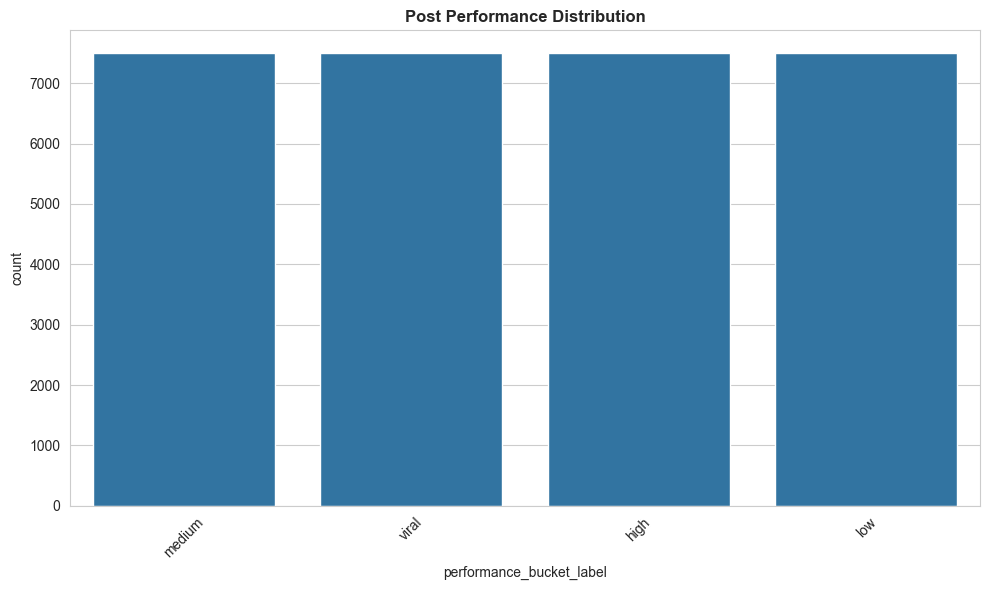

In [29]:
sns.countplot(data=df, x='performance_bucket_label')
plt.title("Post Performance Distribution", fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../visuals/performance_distribution.png", dpi=300)
plt.show()
